In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-reviews/amazon_review_polarity_csv.tgz
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import re

In [38]:
df=pd.read_csv("/kaggle/input/amazon-reviews/test.csv")
df.columns=["polarity","title","review"]
df.head()

,polarity,title,review
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [39]:
df.shape

(399999, 3)

In [40]:
# df=pd.read_csv("/kaggle/input/amazon-reviews/train.csv")
# df.columns =["polarity","title","review"]
# df.head()

In [41]:
df=df.sample(100_000)

In [42]:
df.iloc[:,2]

313759    This is the second time I have reviewed this. ...
79084     I was surprised by this book. My expectations ...
51374     I think these pom poms are probably well made ...
162027    I am additcted to Stephanie Plub's adventures,...
50048     Been using this one to two times a week for ov...
                                ...                        
249430    The movie is very good I do own the Blu Ray ve...
256257    The technical specifications above say that th...
182634    Reading this book of recipes and relating stor...
342578    ok.....I am now in my 30's.....I grew up on De...
301783    July 2012:It died after a little over 2 years ...
Name: review, Length: 100000, dtype: object

In [43]:
df=df[["polarity","review"]]

In [44]:
df["polarity"].value_counts()

polarity
1    50072
2    49928
Name: count, dtype: int64

In [45]:
df.shape

(100000, 2)

In [46]:
df.isnull().sum()

polarity    0
review      0
dtype: int64

In [47]:
df.duplicated().sum()

6

In [48]:
df_=df.drop_duplicates()
df.shape

(100000, 2)

In [49]:
df["polarity"]=df["polarity"].map({2:1,1:0})

In [50]:
def create_wordcloud(input_text):
    plt.figure(figsize=(15,7))
    
    # Customizing WordCloud object with various parameters
    cloud = WordCloud(colormap='viridis', background_color='white', max_words=200, contour_color='steelblue', contour_width=2)
    
    # Generating the word cloud
    wc = cloud.generate(input_text)
    
    # Displaying the word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# DATA VISUALIZATION

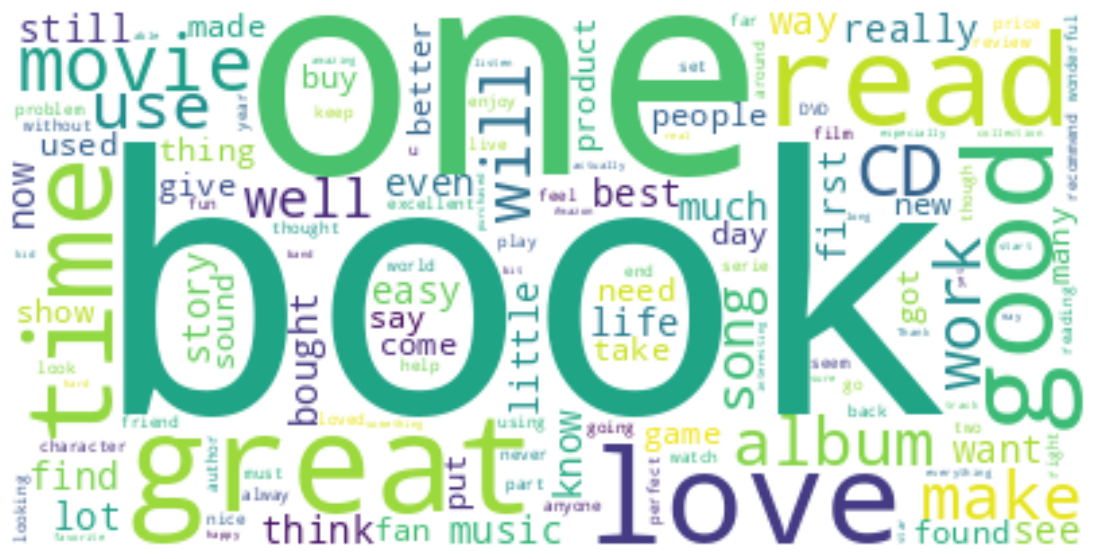

In [16]:
positive=" ".join(df[df["polarity"]==1]["review"])
create_wordcloud(positive)

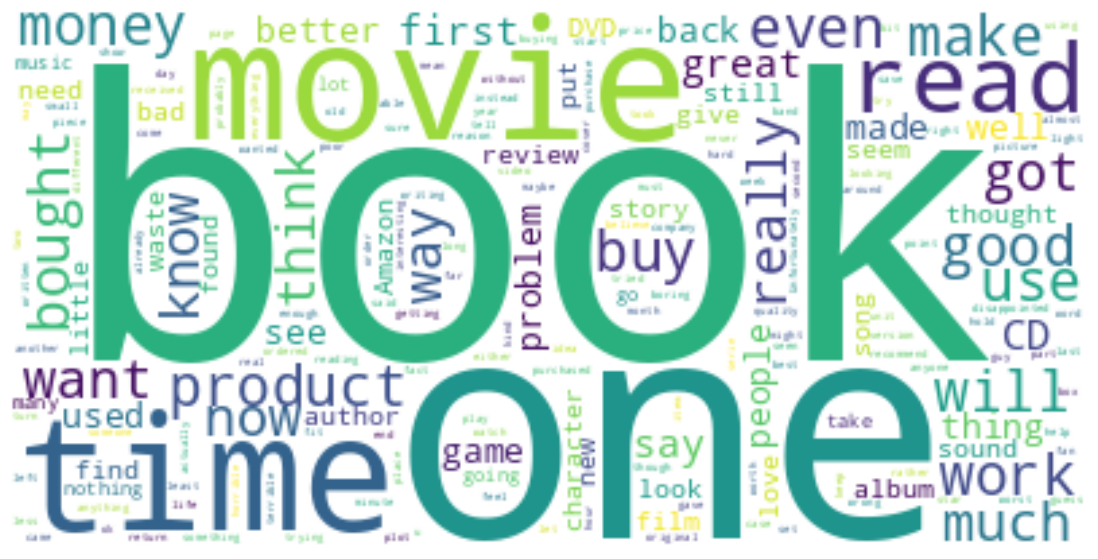

In [17]:
negative=' '.join(df[df['polarity']==0]['review'])
create_wordcloud(negative)

# Preprocessing

In [51]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [52]:
stopwords=stopwords.words("english")
stemmer=PorterStemmer()

In [53]:
def prep1(text):
    text=re.sub('[^a-zA-Z1-9\s]',' ',text.lower())
    
    text=nltk.word_tokenize(text)
    x=[]

    for i in text:
        if i not in stopwords and i not in string.punctuation:
            x.append(i)
    
    text=x.copy()
    x.clear()
    
    for i in text:
        x.append(stemmer.stem(i))
        
    return " ".join(x)

In [54]:
df["review_transformed"]=df["review"].apply(prep1)

In [55]:
df.head()

,polarity,review,review_transformed
313759,0,This is the second time I have reviewed this. ...,second time review link mi fire got wrong set ...
79084,1,I was surprised by this book. My expectations ...,surpris book expect typic roman clef book much...
51374,0,I think these pom poms are probably well made ...,think pom pom probabl well made overal work pl...
162027,1,"I am additcted to Stephanie Plub's adventures,...",additct stephani plub adventur especi love gra...
50048,0,Been using this one to two times a week for ov...,use one two time week month done thing bare st...


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))

In [15]:
X=df["review"]
y=df["polarity"]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
X_tfidf=tfidf.fit_transform(df["review_transformed"]).toarray()

In [58]:
import pickle
with open('vecto.pkl','wb') as file:
    pickle.dump(tfidf,file)

# Machine Learning Algorithms

In [33]:
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [0.5,1,2],
#             'kernel': ['rbf','linear']
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [10,20]
#         }
#     },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [2],
            'solver': ['sag'],
            'class_weight': [None, 'balanced']
        }
    },
#     'naive_bayes_gaussian': {
#         'model': GaussianNB(),
#         'params': {}
#     },
#     'naive_bayes_multinomial': {
#         'model': MultinomialNB(),
#         'params': {}
#     },
#     'decision_tree': {
#         'model': DecisionTreeClassifier(),
#         'params': {
#             'criterion': ['entropy']
            
#         }
   }     


In [35]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,scoring='accuracy')
    clf.fit(X_tfidf,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

NameError: name 'X_tfidf' is not defined

# RNN (Deep Leanring)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,LSTM,Dense,Bidirectional,BatchNormalization

2024-03-10 04:41:55.898878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 04:41:55.898993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 04:41:56.038936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
train_seq=tokenizer.texts_to_sequences(X_train)
test_seq=tokenizer.texts_to_sequences(X_test)

In [19]:
import json
# Save the tokenizer configuration to a file
tokenizer_path = "/kaggle/working/tokenizer_config.json"
tokenizer_json = tokenizer.to_json()

with open(tokenizer_path, 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [20]:
max_length=max([len(item) for item in train_seq])
train_padseq=pad_sequences(train_seq,maxlen=max_length)
test_padseq=pad_sequences(test_seq,maxlen=max_length)

In [21]:
max_length

211

In [22]:
model=Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=16))
model.add(Bidirectional(LSTM(16,return_sequences=  True)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [23]:
model.compile(loss ='binary_crossentropy' ,optimizer = 'adam', metrics = ['accuracy'])

In [24]:
model.build(input_shape=(None, max_length))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 211, 16)        │     1,771,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 211, 32)        │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 211, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 211, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,826,145 (6.97 MB)

 Trainable params: 1,826,081 (6.97 MB)

 Non-trainable params: 64 (256.00 B)

In [26]:
X_train.shape,y_train.shape

((80000,), (80000,))

In [27]:
history=model.fit(train_padseq,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 64s 25ms/step - accuracy: 0.7582 - loss: 0.4777 - val_accuracy: 0.8730 - val_loss: 0.2998
Epoch 2/3
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 56s 25ms/step - accuracy: 0.9099 - loss: 0.2350 - val_accuracy: 0.8740 - val_loss: 0.2998
Epoch 3/3
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 56s 25ms/step - accuracy: 0.9437 - loss: 0.1555 - val_accuracy: 0.8796 - val_loss: 0.3385


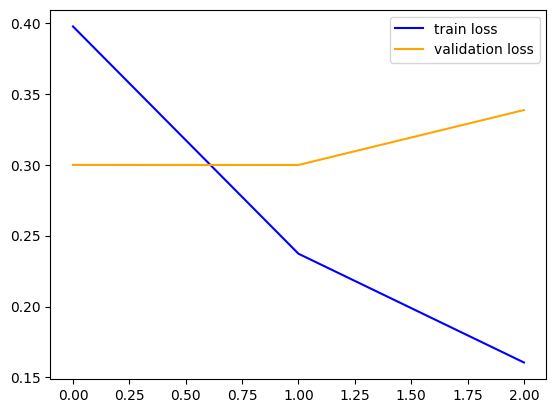

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss , 'b' , label = 'train loss')
plt.plot(val_loss , 'orange' , label = 'validation loss')

plt.legend()
plt.show()

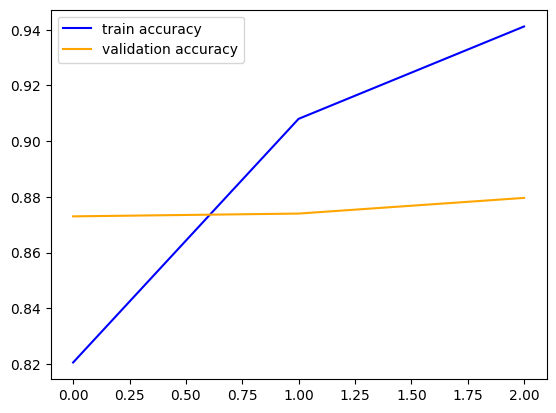

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc , 'b' , label = 'train accuracy')
plt.plot(val_acc , 'orange' , label = 'validation accuracy')

plt.legend()
plt.show()

In [30]:
model.evaluate(test_padseq,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8754 - loss: 0.3507


[0.3441733121871948, 0.8775500059127808]

In [32]:
model.save('sentiment_model.keras')

In [50]:
import pickle 
with open('tokenizer.pkl','wb') as token:
    pickle.dump(tokenizer,token, protocol=pickle.HIGHEST_PROTOCOL)

In [47]:
# with open('lgoisticmodel.pkl','wb') as model:
#     pickle.dump(clf.best_estimator_,model)

In [52]:
test_padseq[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,    77,
          22,    26,   809,    18,     1,   645,     7,    20,  1663,
          17,    26,  2165,    18,     1,   326,     3,  2526,    66,
          11,     4,   153,   279,    18,     2,   122,    96,  2526,
          66,    27,

In [62]:
y_pred=model.predict(test_padseq)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


In [64]:
test_padseq.shape

(20000, 216)

In [63]:
y_pred.shape

(20000, 1)

In [60]:
np.array(y_test)[0:5]

array([0, 1, 1, 1, 0])

In [66]:
y_pred[0:5]

array([[0.05781688],
       [0.9572241 ],
       [0.9872792 ],
       [0.9884596 ],
       [0.00953413]], dtype=float32)